# Marketing Campaign
#### Kenechi Franklin Dukor

In [0]:
# !wget "https://github.com/kennydukor/AI-PROJECTS/blob/master/Test/Sample_submission_terragon.csv"
# !wget "https://github.com/kennydukor/AI-PROJECTS/blob/master/Test/Test_terragon.csv"
# !wget "https://github.com/kennydukor/AI-PROJECTS/blob/master/Test/Train_terragon.csv"

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [90]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Pulling data from google drive

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [93]:
# This code assumes your CSV files are in a folder. It will print out the files in a folder and their unique identifiers which will be used below. 
# Replace <FOLDER ID> with the long string of numbers and letters in the URL of the folder in Google Drive. 
# If the files are located at the top level of Google Drive, replace <FOLDER ID> with ‘root’. The output should look like:

file_list = drive.ListFile({'q': "'1UDG_qUqQq1S_HUGDfg7MI206OsH9_fc1' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Train_terragon.csv, id: 1RUCr6enN_5uIDv7pI60NyqTMN24t2VNu
title: Test_terragon.csv, id: 15QaZ-d2SNMdAJ9fpVoYKB_hLZ7D1gOGd
title: Sample_submission_terragon.csv, id: 1lI7RgIHrRnlu8FgdfgZAR5-nd_oHcwCS


In [0]:
train_downloaded = drive.CreateFile({'id': '1RUCr6enN_5uIDv7pI60NyqTMN24t2VNu'})
train_downloaded.GetContentFile('Train_terragon.csv')
test_downloaded = drive.CreateFile({'id': '15QaZ-d2SNMdAJ9fpVoYKB_hLZ7D1gOGd'})
test_downloaded.GetContentFile('Test_terragon.csv')  
test_downloaded = drive.CreateFile({'id': '1lI7RgIHrRnlu8FgdfgZAR5-nd_oHcwCS'})
test_downloaded.GetContentFile('Sample_submission_terragon.csv')  

In [95]:
!ls

count_plot.png		   deposit_fre_poutcome.png
datalab			   education_vs_depo_stack.png
deposit_fre_day.png	   hist_age.png
deposit_fre_education.png  marital_vs_depo_stack.png
deposit_fre_job.png	   Sample_submission_terragon.csv
deposit_fre_marital.png    Test_terragon.csv
deposit_fre_month.png	   Train_terragon.csv


In [96]:
dataframe = pd.read_csv("Train_terragon.csv")
print(dataframe.info())
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8929 entries, 0 to 8928
Data columns (total 18 columns):
customer_id    8929 non-null object
age            8929 non-null int64
job            8929 non-null object
marital        8929 non-null object
education      8929 non-null object
default        8929 non-null object
balance        8929 non-null int64
housing        8929 non-null object
loan           8929 non-null object
contact        8929 non-null object
day            8929 non-null int64
month          8929 non-null object
duration       8929 non-null int64
campaign       8929 non-null int64
pdays          8929 non-null int64
previous       8929 non-null int64
poutcome       8929 non-null object
deposit        8929 non-null int64
dtypes: int64(8), object(10)
memory usage: 1.2+ MB
None


,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,RGD002844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,RGD003806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,RGD008310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,RGD001840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,RGD005881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0


In [97]:
# dataframe.columns
dataframe.columns.values

array(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [98]:
# I removed the strings in the customer_id in other to prevent errors
df2 = []
for ids in dataframe['customer_id']:
    df2.append(ids[3:])
print(df2)

['002844', '003806', '008310', '001840', '005881', '006564', '0010037', '002285', '006733', '007278', '004076', '001786', '005534', '0010834', '006396', '004732', '005871', '009015', '001495', '002157', '00603', '002068', '00807', '008301', '00313', '009427', '00522', '007219', '006587', '007287', '00742', '007494', '0010111', '002503', '001394', '001366', '001138', '005042', '001907', '007781', '005640', '007766', '0010763', '002434', '008317', '004576', '006647', '002163', '00539', '00861', '002500', '005482', '003625', '002346', '007031', '005874', '005797', '009176', '009610', '006049', '005925', '004876', '009395', '004713', '001159', '009375', '007828', '008088', '007410', '005560', '0011086', '0010643', '007439', '008324', '005256', '002626', '007988', '004812', '001692', '0010885', '005636', '002933', '009743', '006553', '0010882', '00997', '009307', '004355', '005735', '0010439', '00914', '00298', '006230', '004481', '003914', '004465', '008613', '007874', '005921', '009303', 

In [99]:
# appending the modified ID to the dataframe
dataframe['customer_id2'] = df2
dataframe.head()

,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,customer_id2
0,RGD002844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1,002844
1,RGD003806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1,003806
2,RGD008310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0,008310
3,RGD001840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1,001840
4,RGD005881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0,005881


In [100]:
col =dataframe.columns.tolist()
print(col)

['customer_id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit', 'customer_id2']


In [101]:
# repositioning the customer ID to the front
col = col[-1:] + col[:-1]
dataframe = dataframe[col]
dataframe.head()

,customer_id2,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,002844,RGD002844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,003806,RGD003806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,008310,RGD008310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,001840,RGD001840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,005881,RGD005881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0


In [102]:
del dataframe['customer_id']
dataframe.head()

,customer_id2,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,002844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,003806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,008310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,001840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,005881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0


i later found out that the customer id isnt relevant and could spoil the training 

In [103]:
del dataframe['customer_id2']
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0



The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [104]:
dataframe['education'].unique() #it is unique

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [0]:

# Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

# data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
# data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
# data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [106]:
dataframe['job'].unique()

array(['management', 'retired', 'technician', 'blue-collar',
       'entrepreneur', 'admin.', 'services', 'self-employed',
       'unemployed', 'student', 'unknown', 'housemaid'], dtype=object)

In [107]:
dataframe['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

### Data Exploration

In [108]:
dataframe['deposit'].value_counts()

0    4716
1    4213
Name: deposit, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


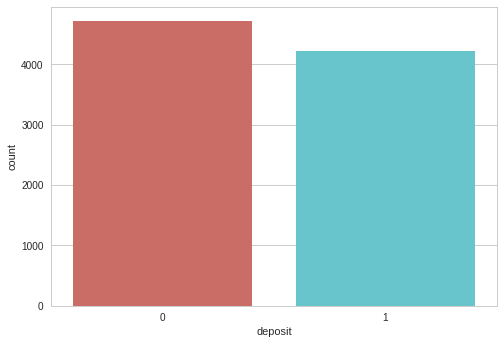

In [109]:
sns.countplot(x = 'deposit',data=dataframe, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 4716 no's and 4213 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [110]:
dataframe.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
0,40.828456,1303.132952,16.076972,220.072307,2.847964,36.029686,0.535199
1,41.766200,1816.429623,15.164966,538.252552,2.154759,67.957987,1.170900


In [111]:
dataframe.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit
job,,,,,,,,
admin.,39.505587,1194.503724,15.236499,350.531657,2.368715,65.575419,1.018622,0.469274
blue-collar,39.662404,1199.501279,15.179028,394.225703,2.560742,42.970588,0.624041,0.361893
entrepreneur,43.019011,1803.794677,15.433460,366.418251,2.760456,34.551331,0.615970,0.387833
housemaid,47.556561,1385.447964,16.371041,350.325792,2.733032,36.280543,0.538462,0.416290
management,40.149877,1827.427518,15.750860,357.278133,2.600983,54.161671,0.920885,0.499754
retired,65.407874,2481.467717,15.480315,382.582677,2.144882,52.897638,0.985827,0.662992
self-employed,39.668693,1806.471125,16.021277,388.072948,2.525836,49.106383,0.930091,0.449848
services,38.054795,1027.476712,15.700000,390.950685,2.510959,50.879452,0.689041,0.408219
student,26.170732,1547.850174,15.104530,324.891986,2.135889,67.905923,1.303136,0.735192


In [112]:
dataframe.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit
education,,,,,,,,
primary,48.291294,1523.982913,15.521562,385.272579,2.658259,39.086249,0.666395,0.392189
secondary,40.161085,1319.306220,15.575074,371.056505,2.476874,53.169743,0.823422,0.446115
tertiary,39.324751,1865.083076,15.745966,365.000687,2.492276,53.275318,0.941641,0.538277
unknown,46.075377,1763.306533,16.095477,352.273869,2.791457,49.329146,0.706030,0.515075


In [113]:
dataframe.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit
marital,,,,,,,,
divorced,47.485714,1339.592381,15.630476,390.078095,2.481905,46.543810,0.712381,0.482857
married,44.582509,1629.373170,15.710328,358.341314,2.629402,49.888801,0.826276,0.430748
single,33.036460,1471.422655,15.538761,384.028319,2.341239,54.943009,0.896637,0.541239


### Visualization

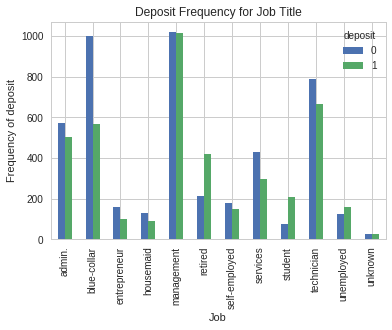

In [114]:
%matplotlib inline
pd.crosstab(dataframe.job, dataframe.deposit).plot(kind="bar")
plt.title("Deposit Frequency for Job Title")
plt.xlabel('Job')
plt.ylabel('Frequency of deposit')
plt.savefig("deposit_fre_job")

We can see that the frequency of purchase of the deposit depends a great deal on the job title. The job titles variation is aalso not baised. Thus, the job title can be a good predictor of the outcome variable.

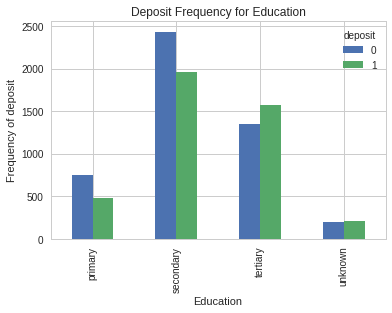

In [115]:
%matplotlib inline
pd.crosstab(dataframe.education, dataframe.deposit).plot(kind="bar")
plt.title("Deposit Frequency for Education")
plt.xlabel('Education')
plt.ylabel('Frequency of deposit')
plt.savefig("deposit_fre_education")

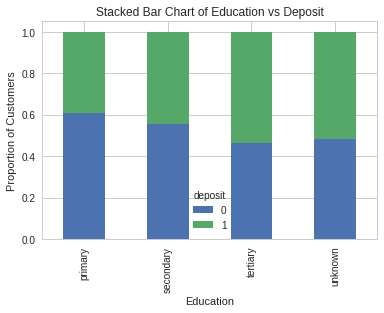

In [116]:
table=pd.crosstab(dataframe.education, dataframe.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Deposit')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('education_vs_depo_stack')

education might be a good predictor

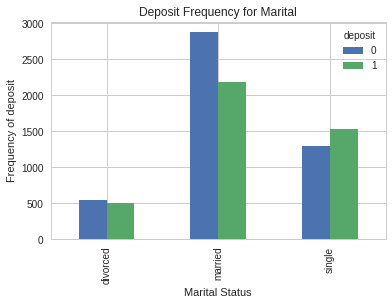

In [117]:
pd.crosstab(dataframe.marital, dataframe.deposit).plot(kind="bar")
plt.title("Deposit Frequency for Marital")
plt.xlabel('Marital Status')
plt.ylabel('Frequency of deposit')
plt.savefig("deposit_fre_marital")

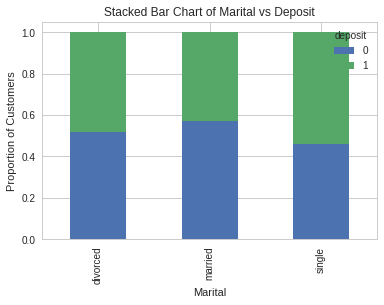

In [118]:
table=pd.crosstab(dataframe.marital, dataframe.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital vs Deposit')
plt.xlabel('Marital')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_depo_stack')

The marital status seems to be a good predictor

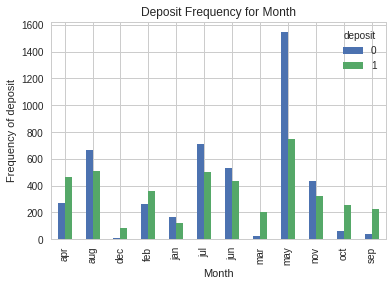

In [119]:
pd.crosstab(dataframe.month, dataframe.deposit).plot(kind="bar")
plt.title("Deposit Frequency for Month")
plt.xlabel('Month')
plt.ylabel('Frequency of deposit')
plt.savefig("deposit_fre_month")

The months seem to be a good predictor

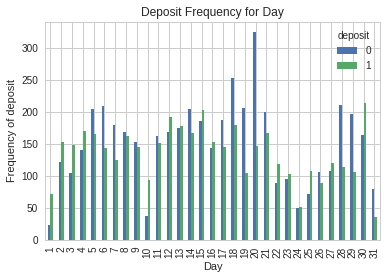

In [120]:
pd.crosstab(dataframe.day, dataframe.deposit).plot(kind="bar")
plt.title("Deposit Frequency for Day")
plt.xlabel('Day')
plt.ylabel('Frequency of deposit')
plt.savefig("deposit_fre_day")

days might not be a good predictor

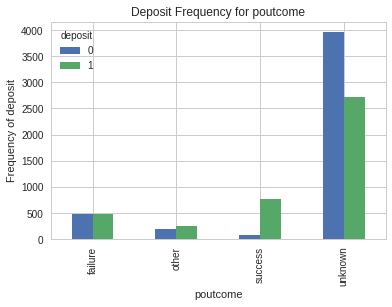

In [121]:
pd.crosstab(dataframe.poutcome, dataframe.deposit).plot(kind="bar")
plt.title("Deposit Frequency for poutcome")
plt.xlabel('poutcome')
plt.ylabel('Frequency of deposit')
plt.savefig("deposit_fre_poutcome")

poutcome might be a good predictor

In [122]:
dataframe.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

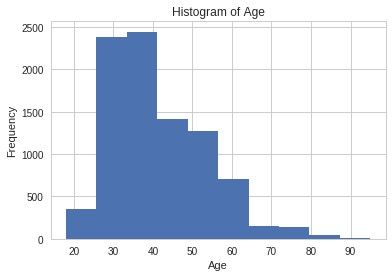

In [123]:
dataframe.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers are between 30 and 40

## Create dummy variables

In [0]:
category_variables=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in category_variables:
    cat_list='var_'+var
    cat_list = pd.get_dummies(dataframe[var], prefix=var)
    data1=dataframe.join(cat_list)
    dataframe=data1

- What if the test set is small and some values are absent? Or it has new values not present in the training set, for example Volkswagen?

- Two solutions come to mind. One is two pd.concat(( train, test )), get_dummies() and then split the set back. If columns sets in train and test differ, you can extract and concatenate just the categorical columns to encode.

In [0]:
category_variable=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=dataframe.columns.values.tolist()
to_keep=[i for i in data_vars if i not in category_variable]

In [126]:
data_final=dataframe[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [0]:
data_final_vars=data_final.columns.values.tolist()
y=['deposit']
X=[i for i in data_final_vars if i not in y]

## Feature Selection

In [0]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [129]:
logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False  True False  True False  True False  True False
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True]
[32 34 31 30 21 33 26 29 28 14  5 13  2 11 23  1 25  6 16 19  4 18 12 24
  9 17 15 27  1  8  1 10  1  7  1 22  1  1  3  1  1 20  1  1  1  1  1  1
  1  1  1]


The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [0]:

cols=['job_services', 'housing_no', 'loan_no', 'loan_yes', 'contact_cellular', 'month_apr', 'month_aug', 'month_feb', 
      'month_jan', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'] 
X=data_final[cols]
y=data_final['deposit']

## Implementing the Model

In [131]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.586162
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                 8929
Model:                          Logit   Df Residuals:                     8912
Method:                           MLE   Df Model:                           16
Date:                Thu, 26 Apr 2018   Pseudo R-squ.:                  0.1524
Time:                        08:24:43   Log-Likelihood:                -5233.8
converged:                       True   LL-Null:                       -6174.9
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
job_services        -0.0921      0.087     -1.065      0.287      -0.262       0.077
housing_no 

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

## Logistic Regression Model Fitting

splitting the train_set to get a test_set

In [132]:
# Here i splitted the trsin set to get test_set. I will still used the provided test set later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicting the test set results and caculating the accuracy

In [0]:
y_pred = logreg.predict(X_test)

In [134]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


using the already provided test set

In [135]:
test_set = pd.read_csv('Test_terragon.csv')
test_set.head()

,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,RGD00718,38,management,married,tertiary,no,179,no,no,unknown,8,aug,317,4,-1,0,unknown
1,RGD0011005,31,blue-collar,married,secondary,no,1664,yes,no,cellular,7,may,603,2,17,2,failure
2,RGD008251,58,management,single,tertiary,no,342,no,yes,cellular,11,jul,564,2,-1,0,unknown
3,RGD005377,40,unemployed,married,secondary,no,1289,no,no,cellular,26,may,260,2,-1,0,unknown
4,RGD006892,46,admin.,married,secondary,no,1264,no,no,telephone,28,jan,100,2,-1,0,unknown


In [136]:
# removing string from customer ID

df2 = []
for ids in test_set['customer_id']:
    df2.append(ids[3:])
   
# appending new column to dataframe
test_set['customer_id2'] = df2

# deleting customer_id
del test_set['customer_id']

#moving the new column to the first position
col =test_set.columns.tolist()
col = col[-1:] + col[:-1]
test_set = test_set[col]
test_set.head()

,customer_id2,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,00718,38,management,married,tertiary,no,179,no,no,unknown,8,aug,317,4,-1,0,unknown
1,0011005,31,blue-collar,married,secondary,no,1664,yes,no,cellular,7,may,603,2,17,2,failure
2,008251,58,management,single,tertiary,no,342,no,yes,cellular,11,jul,564,2,-1,0,unknown
3,005377,40,unemployed,married,secondary,no,1289,no,no,cellular,26,may,260,2,-1,0,unknown
4,006892,46,admin.,married,secondary,no,1264,no,no,telephone,28,jan,100,2,-1,0,unknown


In [137]:
test_set.columns.values

array(['customer_id2', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype=object)

In [138]:

cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
test_vars=test_set.columns.values.tolist()
test_to_keep=[i for i in test_vars if i not in cat_vars]

test_final=test_set[test_to_keep]
#data_final.columns.values

cols = ['customer_id2', 'age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
test_data=test_final[cols]
#to_predict=test_final['deposit']

KeyError: ignored

In [86]:
y_pred = logreg.predict(test_data)

ValueError: ignored

## Cross Validation